# Imports & Constant Variables

In [63]:
import random
import time
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

input_sizes_merge = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 15000, 20000, 25000]#, 30000, 40000, 50000, 75000, 100000, 150000]
input_sizes = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 75000, 100000, 150000]

### Plotting

In [64]:
def plot_arrays(in_sizes, plot_metric, plot_metric_label):
    in_sizes = np.array(in_sizes)
    plot_metric = np.array(plot_metric)

    # Transform your data
    sqrt_execution_times = np.sqrt(plot_metric)
    log_execution_times = plot_metric / np.log(in_sizes)

    # Perform linear regression
    slope1, intercept1, _, _, _ = stats.linregress(in_sizes, sqrt_execution_times)
    slope2, intercept2, _, _, _ = stats.linregress(in_sizes, log_execution_times)

    # Calculate fitted values
    fitted_values1 = intercept1 + slope1 * in_sizes
    fitted_values2 = intercept2 + slope2 * in_sizes

    # Plot recorded execution times and fitted values
    plt.plot(in_sizes, plot_metric, "b", label=f"Recorded {plot_metric_label}")
    plt.plot(in_sizes, fitted_values1**2, "r:", label='Fitted O(n^2)')
    plt.plot(in_sizes, fitted_values2*np.log(in_sizes), "g:", label='Fitted O(n log n)')

    # Add labels and legend
    plt.xlabel('Input Sizes')
    plt.ylabel(plot_metric_label)
    plt.legend()

    plt.grid(True)
    plt.show()

# Insertion Sort

Input size: 1000, Steps: 258335, Execution time: 0.12507343292236328 seconds
Input size: 2000, Steps: 1001328, Execution time: 0.46433520317077637 seconds
Input size: 3000, Steps: 2266345, Execution time: 1.0306901931762695 seconds
Input size: 4000, Steps: 3996423, Execution time: 1.8509440422058105 seconds
Input size: 5000, Steps: 6167665, Execution time: 2.821176767349243 seconds
Input size: 6000, Steps: 9049201, Execution time: 4.214821100234985 seconds
Input size: 7000, Steps: 12232239, Execution time: 5.776227951049805 seconds
Input size: 8000, Steps: 16122808, Execution time: 7.574953079223633 seconds
Input size: 9000, Steps: 20239914, Execution time: 9.434227228164673 seconds
Input size: 10000, Steps: 25101307, Execution time: 11.769622087478638 seconds
Input size: 15000, Steps: 56265784, Execution time: 26.68484663963318 seconds
Input size: 20000, Steps: 99529832, Execution time: 46.2748646736145 seconds
Input size: 25000, Steps: 156395721, Execution time: 72.16690373420715 sec

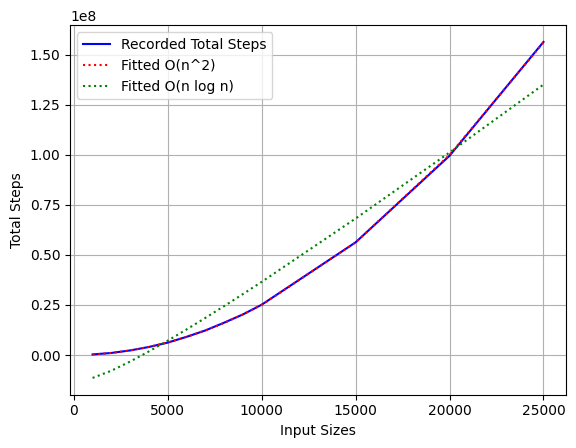

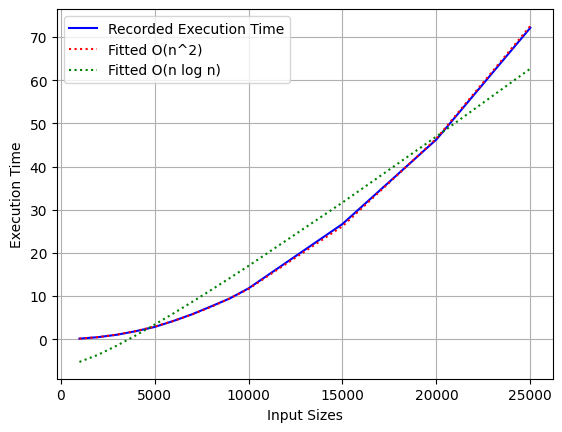

In [65]:
def insertion_sort(arr):
    steps = 0
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
            steps += 1
        arr[j + 1] = key
        steps += 1
    return steps


steps_arr = []
time_arr = []
for size in input_sizes_merge:
    arr = random.sample(range(size), size)  # Generate a random array of given size
    start_time = time.time()

    steps = insertion_sort(arr)
    end_time = time.time()
    execution_time = end_time - start_time
    steps_arr.append(steps)
    time_arr.append(execution_time)

    print(f"Input size: {size}, Steps: {steps}, Execution time: {execution_time} seconds")


plot_arrays(input_sizes_merge, steps_arr, "Total Steps")
plot_arrays(input_sizes_merge, time_arr, "Execution Time")


# Merge Sort

Input size: 1000, Steps: 9976, Execution time: 0.013100862503051758 seconds
Input size: 2000, Steps: 21952, Execution time: 0.027842283248901367 seconds
Input size: 3000, Steps: 34904, Execution time: 0.04381918907165527 seconds
Input size: 4000, Steps: 47904, Execution time: 0.06024813652038574 seconds
Input size: 5000, Steps: 61808, Execution time: 0.07446956634521484 seconds
Input size: 6000, Steps: 75808, Execution time: 0.09005618095397949 seconds
Input size: 7000, Steps: 89808, Execution time: 0.10652613639831543 seconds
Input size: 8000, Steps: 103808, Execution time: 0.12553811073303223 seconds
Input size: 9000, Steps: 118616, Execution time: 0.1392838954925537 seconds
Input size: 10000, Steps: 133616, Execution time: 0.15903353691101074 seconds
Input size: 15000, Steps: 208616, Execution time: 0.23877286911010742 seconds
Input size: 20000, Steps: 287232, Execution time: 0.3298830986022949 seconds
Input size: 25000, Steps: 367232, Execution time: 0.419095516204834 seconds
Input

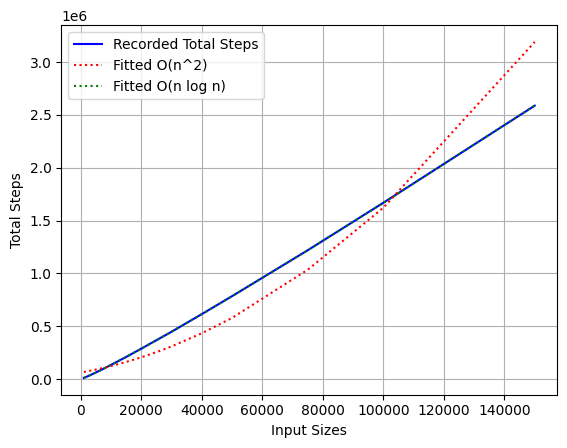

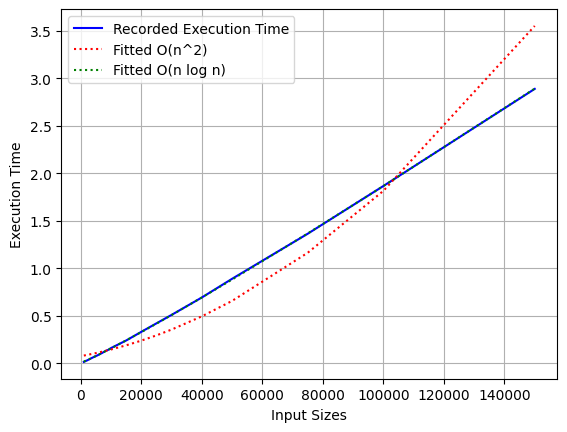

In [66]:
def merge(arr, left, right):
    steps = 0
    i = j = k = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
        steps += 1

    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1
        steps += 1

    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1
        steps += 1

    return steps

def merge_sort(arr):
    steps = 0
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]

        steps += merge_sort(left)
        steps += merge_sort(right)

        steps += merge(arr, left, right)

    return steps

steps_arr = []
time_arr = []
for size in input_sizes:
    arr = random.sample(range(size), size)  # Generate a random array of given size
    start_time = time.time()

    steps = merge_sort(arr)

    end_time = time.time()
    execution_time = end_time - start_time
    steps_arr.append(steps)
    time_arr.append(execution_time)

    print(f"Input size: {size}, Steps: {steps}, Execution time: {execution_time} seconds")


plot_arrays(input_sizes, steps_arr, "Total Steps")
plot_arrays(input_sizes, time_arr, "Execution Time")

# Heap Sort

Input size: 1000, Steps: 28318, Execution time: 0.016574859619140625 seconds
Input size: 2000, Steps: 62582, Execution time: 0.03743290901184082 seconds
Input size: 3000, Steps: 99306, Execution time: 0.06152009963989258 seconds
Input size: 4000, Steps: 136774, Execution time: 0.08129096031188965 seconds
Input size: 5000, Steps: 176336, Execution time: 0.10624217987060547 seconds
Input size: 6000, Steps: 216591, Execution time: 0.12957334518432617 seconds
Input size: 7000, Steps: 257035, Execution time: 0.14953184127807617 seconds
Input size: 8000, Steps: 298097, Execution time: 0.1777172088623047 seconds
Input size: 9000, Steps: 339870, Execution time: 0.20055651664733887 seconds
Input size: 10000, Steps: 382570, Execution time: 0.22961831092834473 seconds
Input size: 15000, Steps: 600189, Execution time: 0.357163667678833 seconds
Input size: 20000, Steps: 825647, Execution time: 0.49233031272888184 seconds
Input size: 25000, Steps: 1056232, Execution time: 0.6286208629608154 seconds


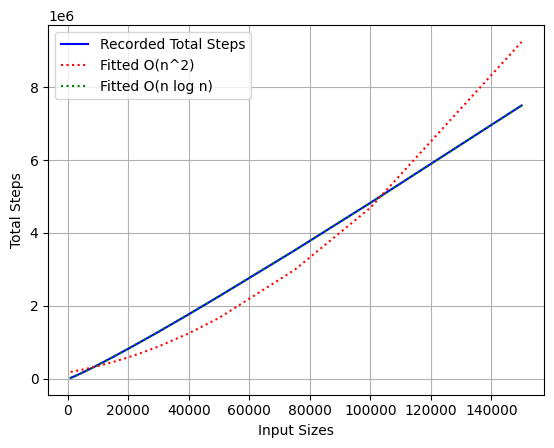

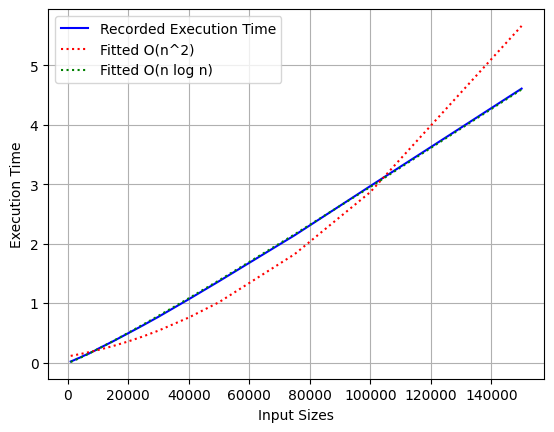

In [67]:
def heapify(arr, n, i):
    steps = 0
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[i] < arr[left]:
        largest = left
    steps += 1

    if right < n and arr[largest] < arr[right]:
        largest = right
    steps += 1

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        steps += 1
        steps += heapify(arr, n, largest)

    return steps

def heapsort(arr):
    steps = 0
    n = len(arr)

    # Build a maxheap. n // 2 - 1 is the index of the last parent node. 
    for i in range(n // 2 - 1, -1, -1):
        steps += heapify(arr, n, i)

    # Extract the elements one by one
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        steps += 1
        steps += heapify(arr, i, 0)

    return steps

steps_arr = []
time_arr = []
for size in input_sizes:
    arr = random.sample(range(size), size)  # Generate a random array of given size
    start_time = time.time()

    steps = heapsort(arr)
    
    end_time = time.time()
    execution_time = end_time - start_time
    steps_arr.append(steps)
    time_arr.append(execution_time)

    print(f"Input size: {size}, Steps: {steps}, Execution time: {execution_time} seconds")

plot_arrays(input_sizes, steps_arr, "Total Steps")
plot_arrays(input_sizes, time_arr, "Execution Time")

# Quick Sort

Input size: 1000, Steps: 6807, Execution time: 0.0060007572174072266 seconds
Input size: 2000, Steps: 11864, Execution time: 0.010520458221435547 seconds
Input size: 3000, Steps: 22960, Execution time: 0.01970386505126953 seconds
Input size: 4000, Steps: 30867, Execution time: 0.025726318359375 seconds
Input size: 5000, Steps: 35622, Execution time: 0.03223133087158203 seconds
Input size: 6000, Steps: 44222, Execution time: 0.04056429862976074 seconds
Input size: 7000, Steps: 52680, Execution time: 0.048467397689819336 seconds
Input size: 8000, Steps: 62833, Execution time: 0.05677175521850586 seconds
Input size: 9000, Steps: 72357, Execution time: 0.06194782257080078 seconds
Input size: 10000, Steps: 81671, Execution time: 0.07111620903015137 seconds
Input size: 15000, Steps: 129558, Execution time: 0.11233043670654297 seconds
Input size: 20000, Steps: 184798, Execution time: 0.1587827205657959 seconds
Input size: 25000, Steps: 217738, Execution time: 0.1884315013885498 seconds
Input 

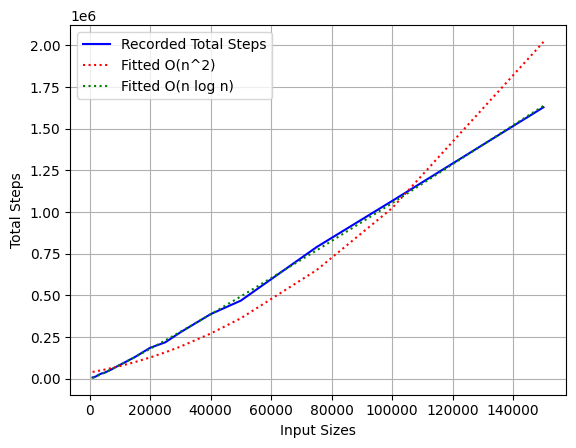

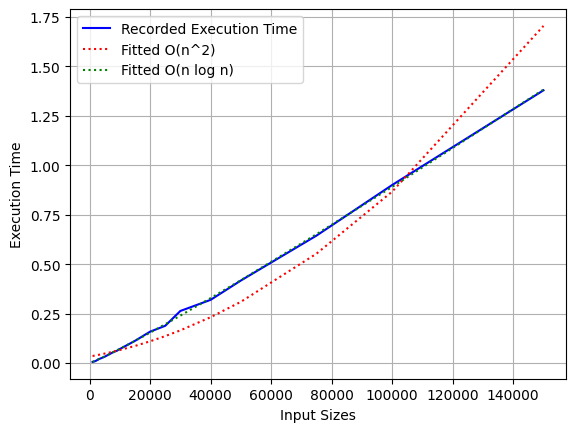

In [68]:
def partition(arr, low, high):
    steps = 0
    # Tracks the last of the smaller elements
    i = low - 1
    pivot = arr[high]

    for j in range(low, high):
        # Check if j is smaller than the pivot
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
            steps += 1
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    steps += 1

    return i + 1, steps

def quicksort(arr, low, high):
    steps = 0
    if low < high:
        pi, steps_partition = partition(arr, low, high)
        steps += steps_partition
        steps += quicksort(arr, low, pi - 1)
        steps += quicksort(arr, pi + 1, high)
    return steps

steps_arr = []
time_arr = []
for size in input_sizes:
    arr = random.sample(range(size), size)  # Generate a random array of given size
    start_time = time.time()

    steps = quicksort(arr, 0, len(arr) - 1)

    end_time = time.time()
    execution_time = end_time - start_time

    steps_arr.append(steps)
    time_arr.append(execution_time)
    print(f"Input size: {size}, Steps: {steps}, Execution time: {execution_time} seconds")

plot_arrays(input_sizes, steps_arr, "Total Steps")
plot_arrays(input_sizes, time_arr, "Execution Time")